# K-Means, means choosing
---
K-Means is a popular machine learning algorithm that helps cluster data into logical groups.
However choosing the correct mean values to use as seed points is a challenge.
These notes attempts to offer an method based on cumulative histogram analysis, to better 'choose' mean seeds.

## Let us assume we have two datasets whose histograms are as follows:

In [10]:
%matplotlib inline

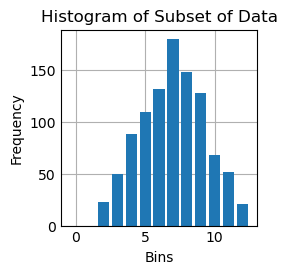

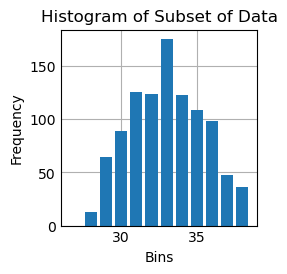

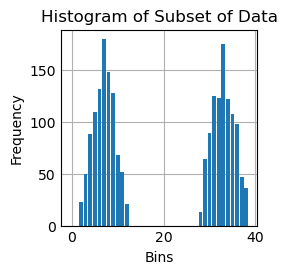

In [190]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 #Try to ensure histogram

def roll_die(sides=6, base=1):
    return np.random.randint(base, base + sides)

def roll_two_dice(sides, base):
    die1 = roll_die(sides, base)
    die2 = roll_die(sides, base)
    return die1+die2

def genSet(sides, base):
    dset = []
    for i in range(N):
        dset.append(roll_two_dice(sides, base))
    return dset

def Histo(dataset):
    H = np.zeros(512, dtype=np.uint32)
    for v in dataset:
        if v < 512 and v > 0:
            H[v] += 1
        else:
            print("overflow")
    return H

def CumulativeHisto(histo):
    H = np.zeros(512, dtype=np.uint32)
    for f in histo:
        H[f] += H[f-1] + f
    return H

def plot(data, minx, maxx):
    # Subset of data
    subset_indicies = np.arange(minx, maxx) #x
    subset_data = data[minx:maxx] #y
    #print(subset_indicies)
    #print(subset_data)


    plt.bar(subset_indicies,subset_data,align='center') # A bar chart

    # Labeling
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Histogram of Subset of Data')

    # Show plot
    plt.grid(True)
    plt.show()
#==============================================================================
np.random.seed(1)

# two six sided dice 2-12 range(2*base, 2*(base-1)+sides*2)
set1 = genSet(6, 1)  #2 to 12
H1 = Histo(set1)
plot(H1, 0, 13)
#print(H1)
set2 = genSet(6, 14)  # 2*(14), 2*(14-1)+12 : 28, 26+12=38 
H2 = Histo(set2)
plot(H2, 27, 39)
#print(H2)
H = H1+H2
#print(H)
plot(H, 0, 39)
C=CumulativeHisto(H)
#print(C)